# Homework-2: MLP for MNIST Classification

### In this homework, you need to
- #### implement SGD optimizer (`./optimizer.py`)
- #### implement forward and backward for FCLayer (`layers/fc_layer.py`)
- #### implement forward and backward for SigmoidLayer (`layers/sigmoid_layer.py`)
- #### implement forward and backward for ReLULayer (`layers/relu_layer.py`)
- #### implement EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### implement SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [5]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## Set Hyerparameters
You can modify hyerparameters by yourself.

In [6]:
batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.1

disp_freq = 50

## 1. MLP with Euclidean Loss
In part-1, you need to train a MLP with **Euclidean Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively.
### TODO
Before executing the following code, you should complete **./optimizer.py** and **criterion/euclidean_loss.py**.

In [7]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 MLP with Euclidean Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/fc_layer.py** and **layers/sigmoid_layer.py**.

In [8]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [9]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.


2022-08-07 17:36:08.275838: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch [0][20]	 Batch [0][550]	 Training Loss 1.5899	 Accuracy 0.1200
Epoch [0][20]	 Batch [50][550]	 Training Loss 1.5299	 Accuracy 0.1208
Epoch [0][20]	 Batch [100][550]	 Training Loss 1.5214	 Accuracy 0.1211
Epoch [0][20]	 Batch [150][550]	 Training Loss 1.5262	 Accuracy 0.1202
Epoch [0][20]	 Batch [200][550]	 Training Loss 1.5207	 Accuracy 0.1212
Epoch [0][20]	 Batch [250][550]	 Training Loss 1.5223	 Accuracy 0.1210
Epoch [0][20]	 Batch [300][550]	 Training Loss 1.5208	 Accuracy 0.1222
Epoch [0][20]	 Batch [350][550]	 Training Loss 1.5184	 Accuracy 0.1218
Epoch [0][20]	 Batch [400][550]	 Training Loss 1.5178	 Accuracy 0.1216
Epoch [0][20]	 Batch [450][550]	 Training Loss 1.5173	 Accuracy 0.1222
Epoch [0][20]	 Batch [500][550]	 Training Loss 1.5182	 Accuracy 0.1217

Epoch [0]	 Average training loss 1.5172	 Average training accuracy 0.1220
Epoch [0]	 Average validation loss 1.5089	 Average validation accuracy 0.1190

Epoch [1][20]	 Batch [0][550]	 Training Loss 1.5899	 Accuracy 0.1200

In [10]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.1184.



## 1.2 MLP with Euclidean Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/relu_layer.py**.

In [11]:
from layers import ReLULayer

reluMLP = Network()
# TODO build ReLUMLP with FCLayer and ReLULayer
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [12]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.0980.



## Plot

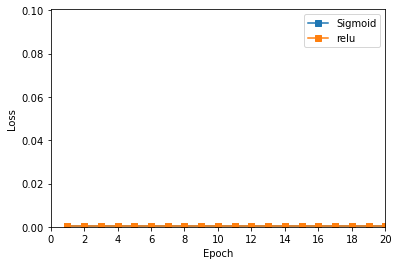

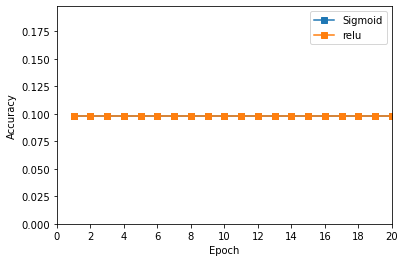

In [ ]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. MLP with Softmax Cross-Entropy Loss
In part-2, you need to train a MLP with **Softmax Cross-Entropy Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively again.
### TODO
Before executing the following code, you should complete **criterion/softmax_cross_entropy_loss.py**.

In [ ]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 MLP with Softmax Cross-Entropy Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Softmax cross-entropy loss function.

In [ ]:
sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### Train

In [ ]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

KeyboardInterrupt: 

### Test

In [ ]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.0980.



## 2.2 MLP with Softmax Cross-Entropy Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Softmax cross-entropy loss function.

In [ ]:
reluMLP = Network()
# Build ReLUMLP with FCLayer and ReLULayer
# 128 is the number of hidden units, you can change by your own
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [ ]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.5354	 Accuracy 0.1300
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.5354	 Accuracy 0.0963
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.5354	 Accuracy 0.1001
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.5354	 Accuracy 0.0996
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.5354	 Accuracy 0.0996
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.5354	 Accuracy 0.0988
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.5354	 Accuracy 0.0987
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.5354	 Accuracy 0.0981
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.5354	 Accuracy 0.0982
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.5354	 Accuracy 0.0983
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.5354	 Accuracy 0.0986

Epoch [0]	 Average training loss 2.5354	 Average training accuracy 0.0988
Epoch [0]	 Average validation loss 2.5354	 Average validation accuracy 0.0978

Epoch [1][20]	 Batch [0][550]	 Training Loss 2.5354	 Accuracy 0.1300


Epoch [8]	 Average training loss 2.5354	 Average training accuracy 0.0988
Epoch [8]	 Average validation loss 2.5354	 Average validation accuracy 0.0978

Epoch [9][20]	 Batch [0][550]	 Training Loss 2.5354	 Accuracy 0.1300
Epoch [9][20]	 Batch [50][550]	 Training Loss 2.5354	 Accuracy 0.0963
Epoch [9][20]	 Batch [100][550]	 Training Loss 2.5354	 Accuracy 0.1001
Epoch [9][20]	 Batch [150][550]	 Training Loss 2.5354	 Accuracy 0.0996
Epoch [9][20]	 Batch [200][550]	 Training Loss 2.5354	 Accuracy 0.0996
Epoch [9][20]	 Batch [250][550]	 Training Loss 2.5354	 Accuracy 0.0988
Epoch [9][20]	 Batch [300][550]	 Training Loss 2.5354	 Accuracy 0.0987
Epoch [9][20]	 Batch [350][550]	 Training Loss 2.5354	 Accuracy 0.0981
Epoch [9][20]	 Batch [400][550]	 Training Loss 2.5354	 Accuracy 0.0982
Epoch [9][20]	 Batch [450][550]	 Training Loss 2.5354	 Accuracy 0.0983
Epoch [9][20]	 Batch [500][550]	 Training Loss 2.5354	 Accuracy 0.0986

Epoch [9]	 Average training loss 2.5354	 Average training accuracy 

Epoch [17][20]	 Batch [350][550]	 Training Loss 2.5354	 Accuracy 0.0981
Epoch [17][20]	 Batch [400][550]	 Training Loss 2.5354	 Accuracy 0.0982
Epoch [17][20]	 Batch [450][550]	 Training Loss 2.5354	 Accuracy 0.0983
Epoch [17][20]	 Batch [500][550]	 Training Loss 2.5354	 Accuracy 0.0986

Epoch [17]	 Average training loss 2.5354	 Average training accuracy 0.0988
Epoch [17]	 Average validation loss 2.5354	 Average validation accuracy 0.0978

Epoch [18][20]	 Batch [0][550]	 Training Loss 2.5354	 Accuracy 0.1300
Epoch [18][20]	 Batch [50][550]	 Training Loss 2.5354	 Accuracy 0.0963
Epoch [18][20]	 Batch [100][550]	 Training Loss 2.5354	 Accuracy 0.1001
Epoch [18][20]	 Batch [150][550]	 Training Loss 2.5354	 Accuracy 0.0996
Epoch [18][20]	 Batch [200][550]	 Training Loss 2.5354	 Accuracy 0.0996
Epoch [18][20]	 Batch [250][550]	 Training Loss 2.5354	 Accuracy 0.0988
Epoch [18][20]	 Batch [300][550]	 Training Loss 2.5354	 Accuracy 0.0987
Epoch [18][20]	 Batch [350][550]	 Training Loss 2.5354	

In [ ]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.0980.



## Plot

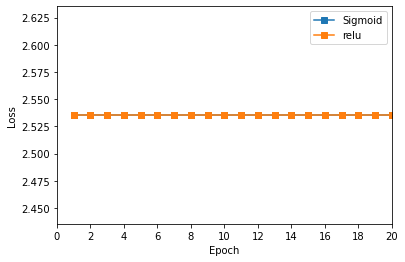

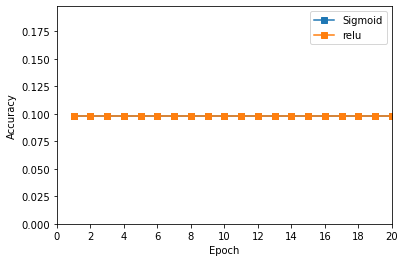

In [ ]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

### ~~You have finished homework2-mlp, congratulations!~~  

**Next, according to the requirements 4) of report:**
### **You need to construct a two-hidden-layer MLP, using any activation function and loss function.**

**Note: Please insert some new cells blow (using '+' bottom in the toolbar) refer to above codes. Do not modify the former code directly.**